In [54]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization 
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [55]:
# import requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [56]:
# import bank_personal_loan dataset
data = pd.read_csv('Bank_Personal_Loan.csv')
df = pd.DataFrame(data)
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Cleaning DataSet 

In [58]:
df['CCAvg'] = df['CCAvg'].replace('/', '.').astype('float64')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [59]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [60]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

count      mean      std     min       25%      50%  \
ID                  5000.0   2500.50  1443.52     1.0   1250.75   2500.5   
Age                 5000.0     45.34    11.46    23.0     35.00     45.0   
Experience          5000.0     20.10    11.47    -3.0     10.00     20.0   
Income              5000.0     73.77    46.03     8.0     39.00     64.0   
ZIP Code            5000.0  93152.50  2121.85  9307.0  91911.00  93437.0   
Family              5000.0      2.40     1.15     1.0      1.00      2.0   
CCAvg               5000.0      1.94     1.75     0.0      0.70      1.5   
Education           5000.0      1.88     0.84     1.0      1.00      2.0   
Mortgage            5000.0     56.50   101.71     0.0      0.00      0.0   
Personal Loan       5000.0      0.10     0.29     0.0      0.00      0.0   
Securities Account  5000.0      0.10     0.31     0.0      0.00      0.0   
CD Account          5000.0      0.06     0.24     0.0      0.00      0.0   
Online              5000.0      0.60     0.49     0.0      0.00      1.0   
CreditCard          5000.0      0.29     0.46     0.0      0.00      0.0   

                         75%      max  
ID                   3750.25   5000.0  
Age                    55.00     67.0  
Experience             30.00     43.0  
Income                 98.00    224.0  
ZIP Code            94608.00  96651.0  
Family                  3.00      4.0  
CCAvg                   2.50     10.0  
Education               3.00      3.0  
Mortgage              101.00    635.0  
Personal Loan           0.00      1.0  
Securities Account      0.00      1.0  
CD Account              0.00      1.0  
Online                  1.00      1.0  
CreditCard              1.00      1.0

In [61]:
# find negative values in Experience columns
df[df['Experience'] < 0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

In [62]:
# convert above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [63]:
# check missing values
df.isna().sum().to_frame().T

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0         0       0      0          0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0

In [64]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 467 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [65]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
Education:
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
Personal Loan:
0    4520
1     480
Name: Personal Loan, dtype: int64
--------------------------------------------------
Securities Account:
0    4478
1     522
Name: Securities Account, dtype: int64
--------------------------------------------------
CD Account:
0    4698
1     302
Name: CD Account, dtype: int64
--------------------------------------------------
Online:
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
CreditCard:
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


In [66]:
# now check duplicated data
df.duplicated().sum()

0

In [67]:
# drop ID and ZIP Code columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

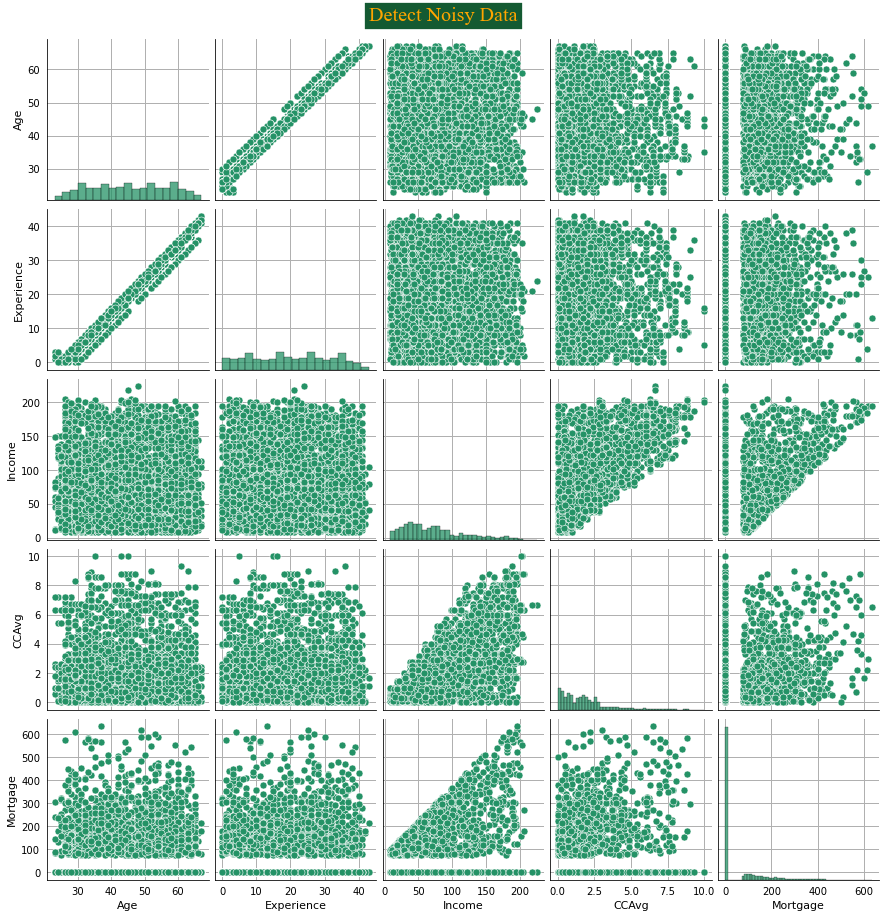

In [68]:
# check noisy data
%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)

plt.show()

In [69]:
fig = go.Figure()
for col in df:
    fig.add_trace(go.Box(x=df[col], name=col))
fig.update_layout(
    title_text="Box Plot Styling Outliers",
    title_font=dict(color='orange', family='newtimeroman', size=25),
    title_x=0.45,
    paper_bgcolor='#145A32',
    # plot_bgcolor='#DAF7A6',
    font=dict(color='#DAF7A6', family='newtimeroman', size=16),
    )
fig.show()


In [70]:
# convert annual income to monthly with divide by 12
df['Income'] = round(df['Income']/12, 2)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

# Exploratory Data Analysis (EDA) 

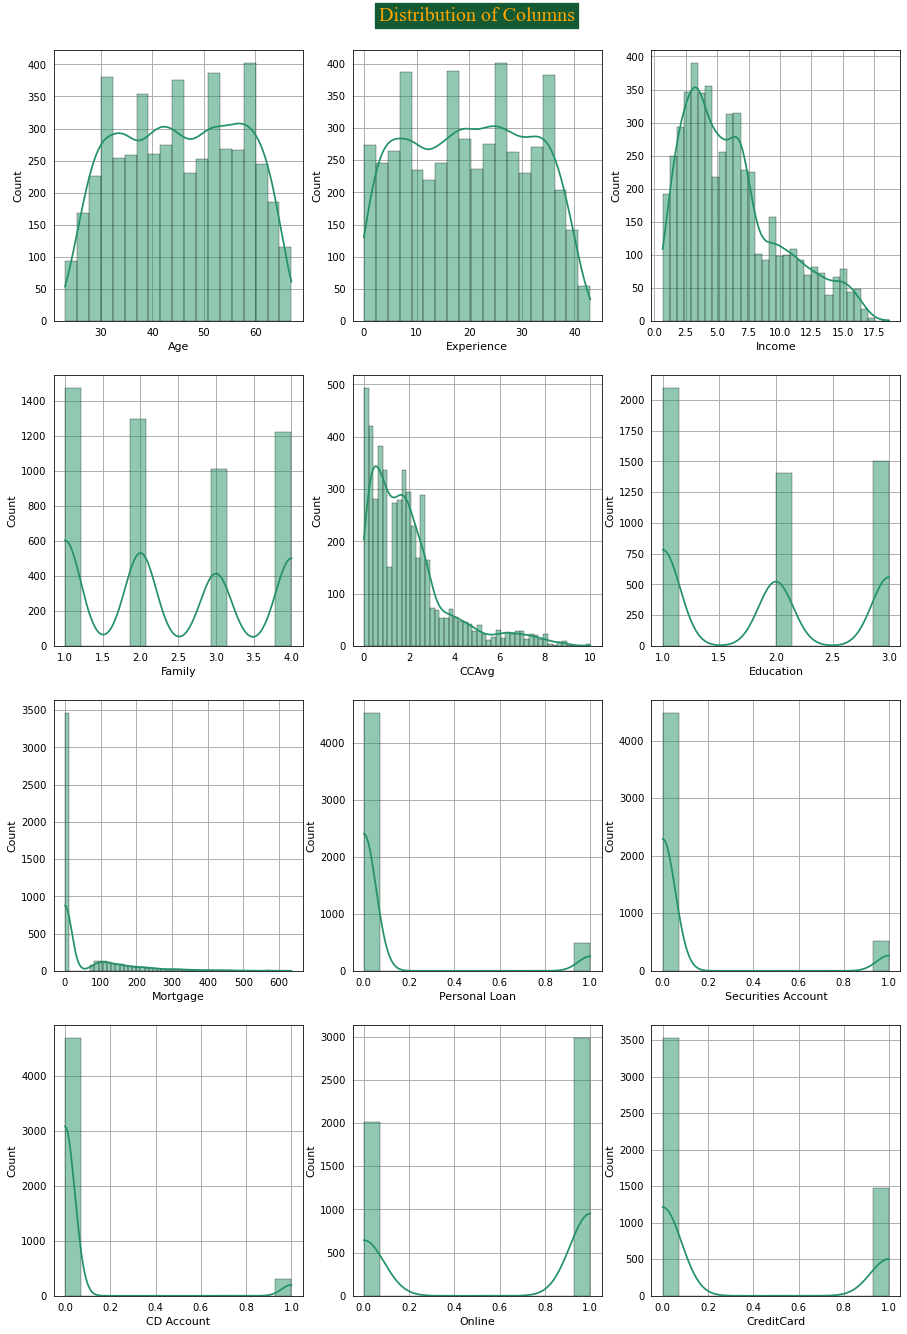

In [71]:
# check distribution Scatter matrix (splom) with go.Splom
sns.set_palette('summer')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

#   Univariate Analysis

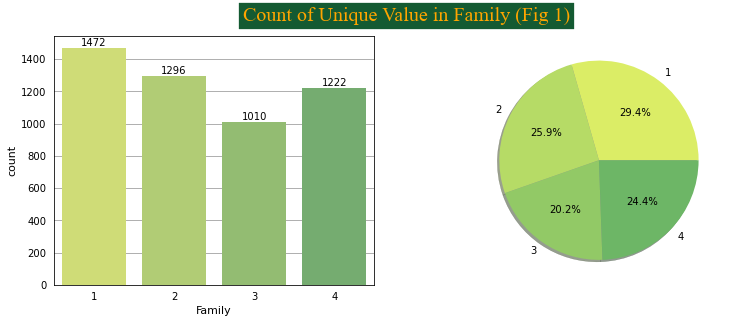

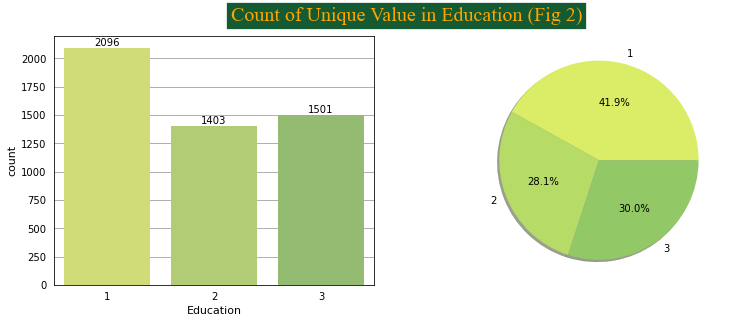

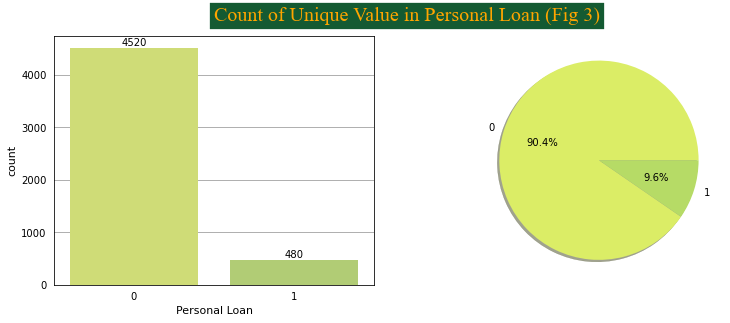

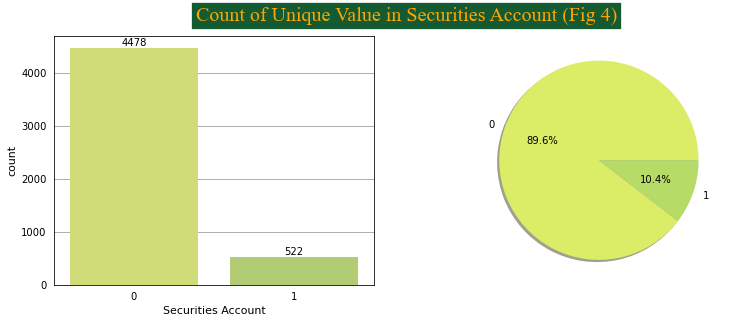

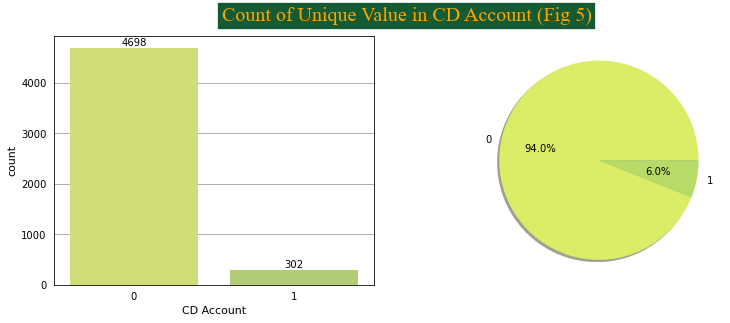

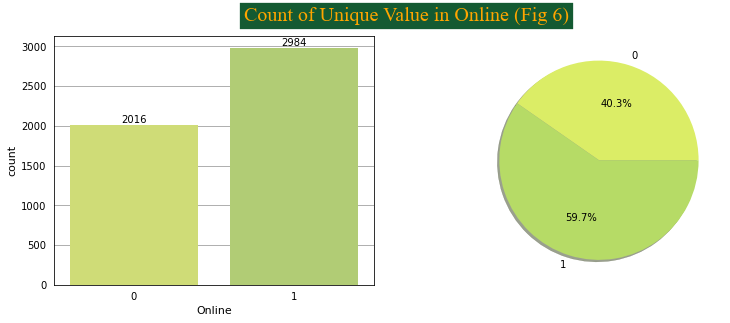

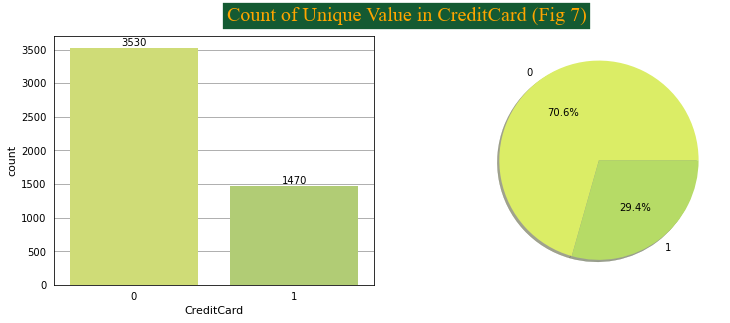

In [72]:
# univariate analysis of categorical data:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [73]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T

count       mean         std    min    25%    50%     75%     max
Age         5000.0  45.338400   11.463166  23.00  35.00  45.00   55.00   67.00
Experience  5000.0  20.134600   11.415189   0.00  10.00  20.00   30.00   43.00
Income      5000.0   6.147912    3.836233   0.67   3.25   5.33    8.17   18.67
CCAvg       5000.0   1.937938    1.747659   0.00   0.70   1.50    2.50   10.00
Mortgage    5000.0  56.498800  101.713802   0.00   0.00   0.00  101.00  635.00

#  Bivariate Analysis

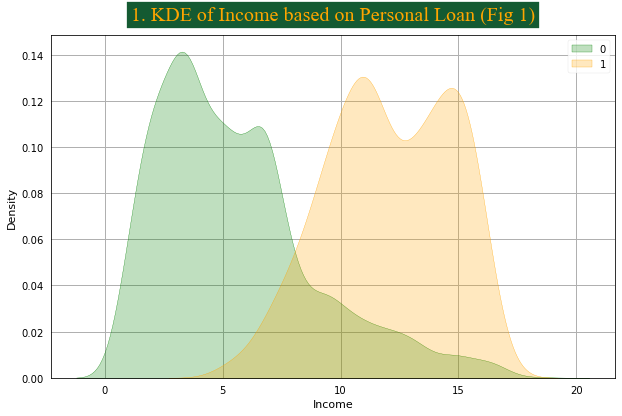

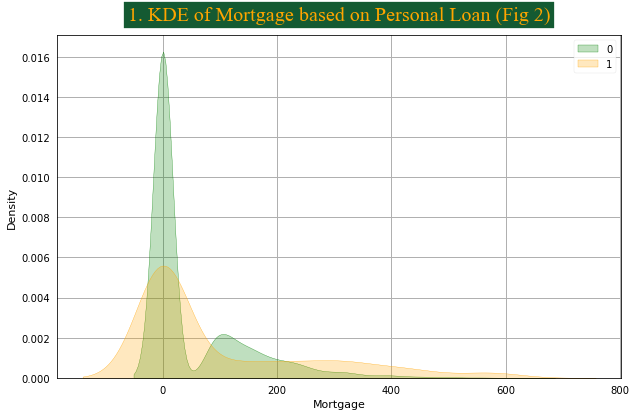

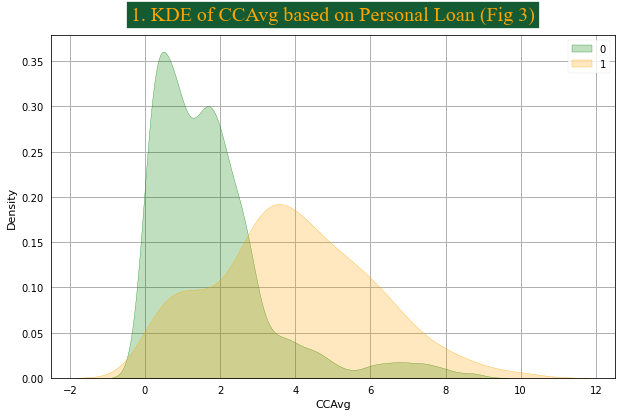

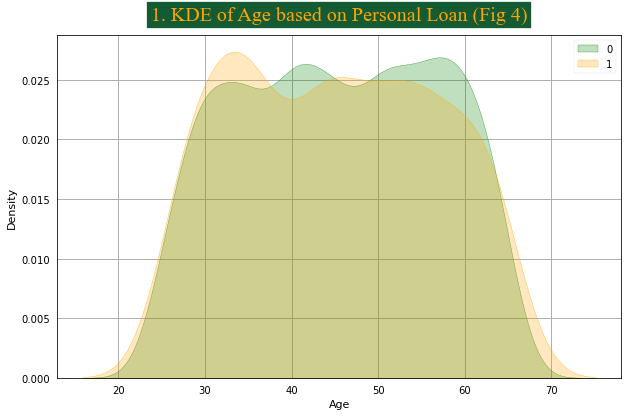

In [74]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['green','orange'])
for j, col in enumerate(['Income','Mortgage','CCAvg','Age']):
    for i, label in enumerate(df['Personal Loan'].unique().tolist()):
        sns.kdeplot(df.loc[df['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'1. KDE of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

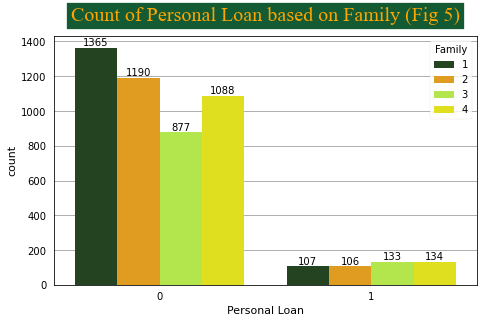

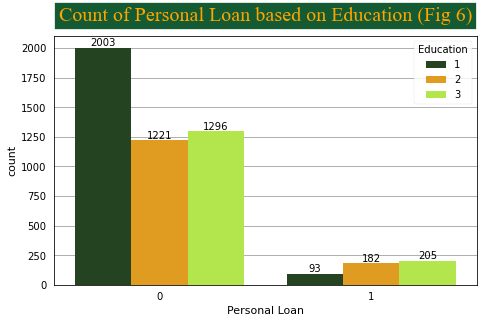

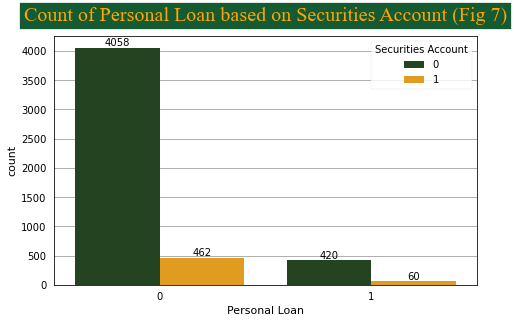

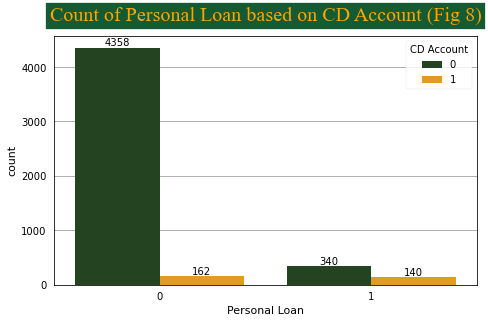

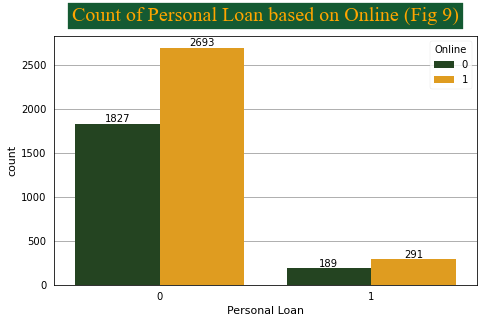

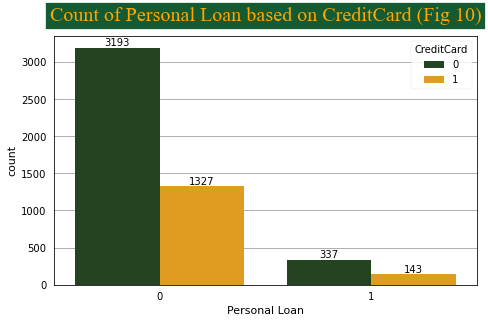

In [75]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
discrete_cols2 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i, col in enumerate(discrete_cols2):
    ax = sns.countplot(data=df, x='Personal Loan', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Personal Loan based on {col} (Fig {i+5})', fontdict=FONT, pad=15)
    plt.show()

============================== Mean of Income in each categorical feature ==============================


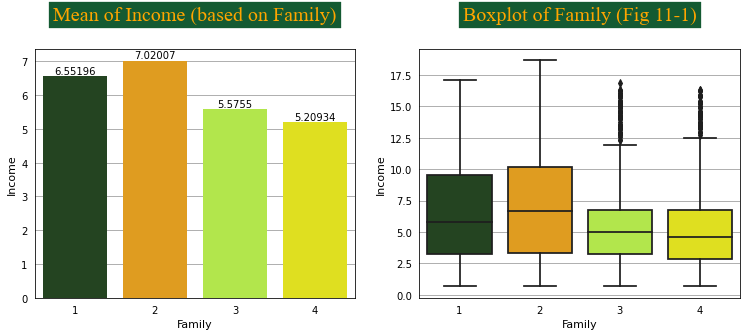

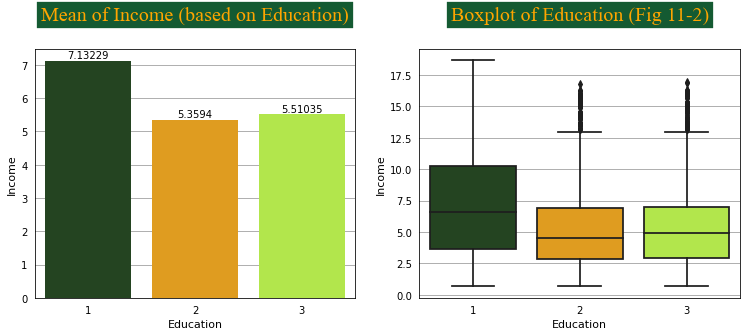

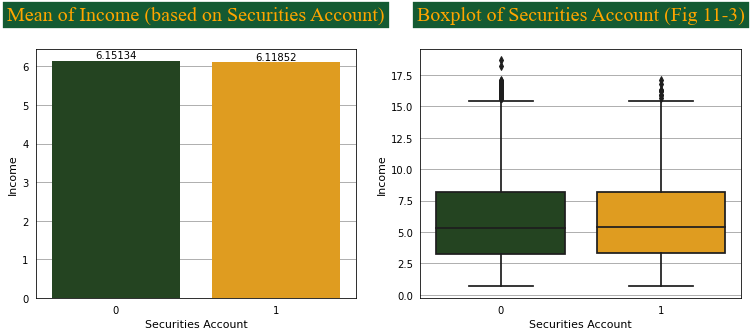

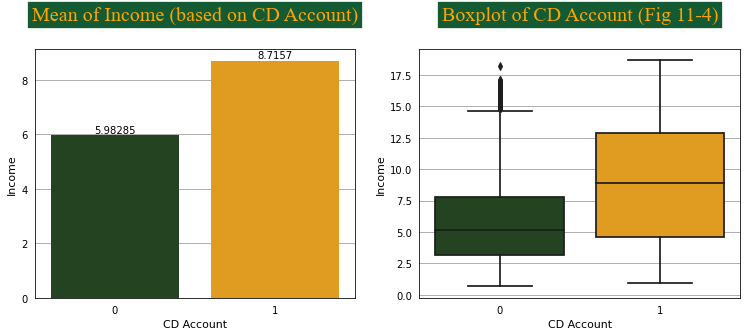

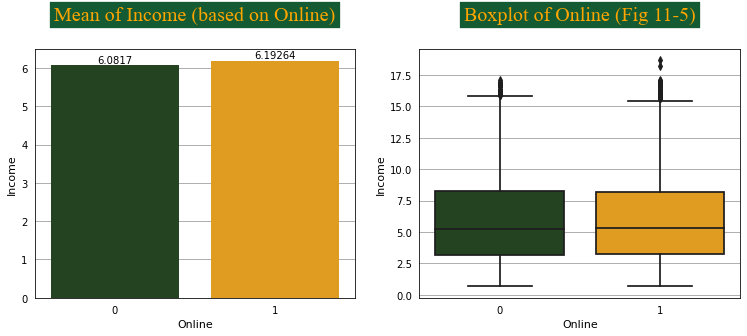

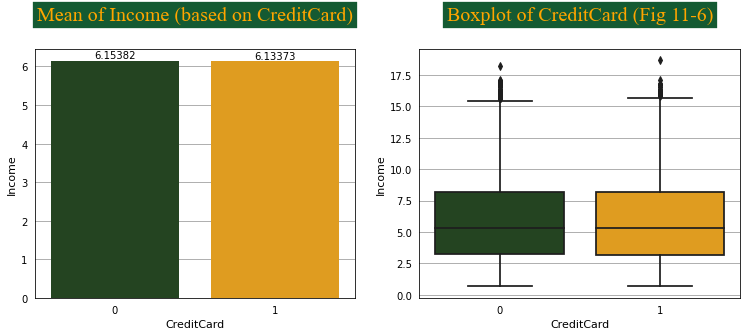

============================== Mean of CCAvg in each categorical feature ==============================


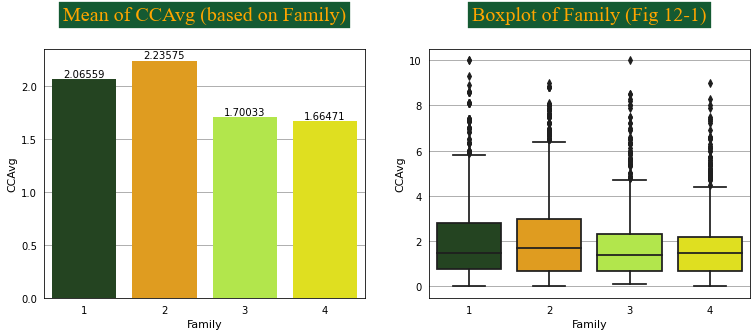

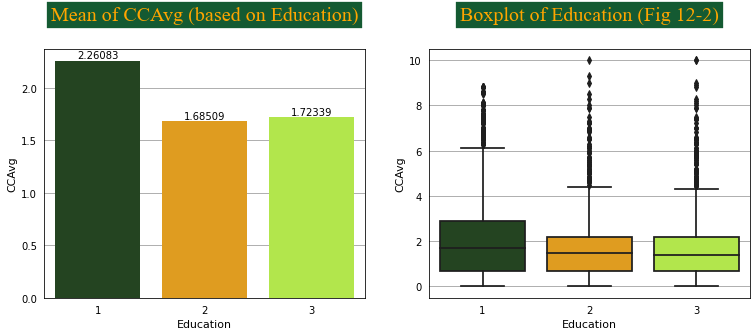

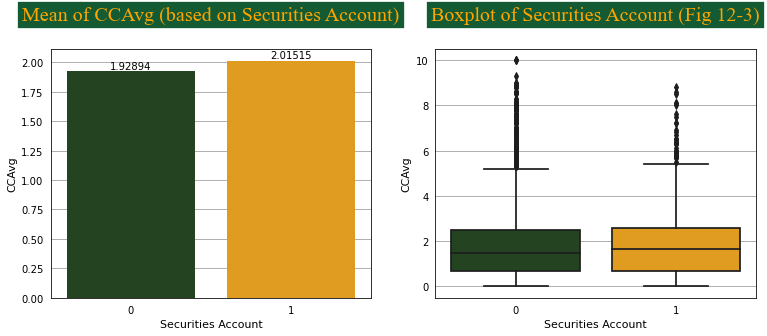

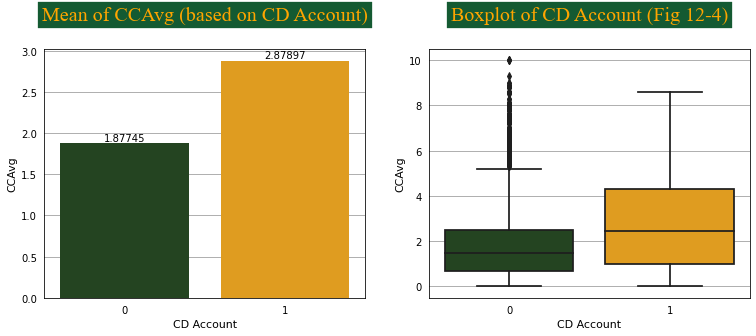

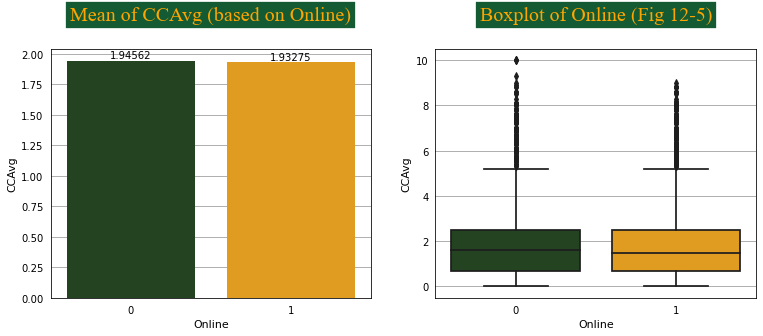

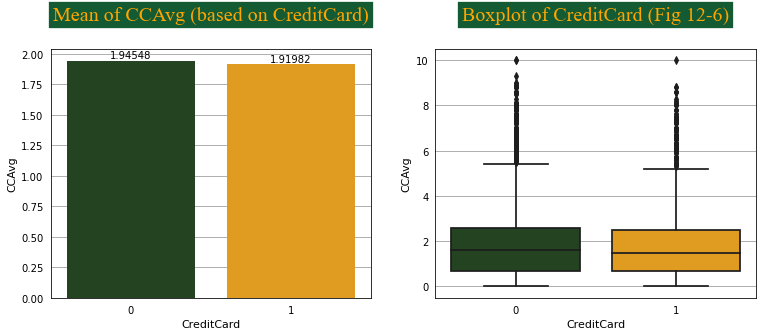

============================== Mean of Mortgage in each categorical feature ==============================


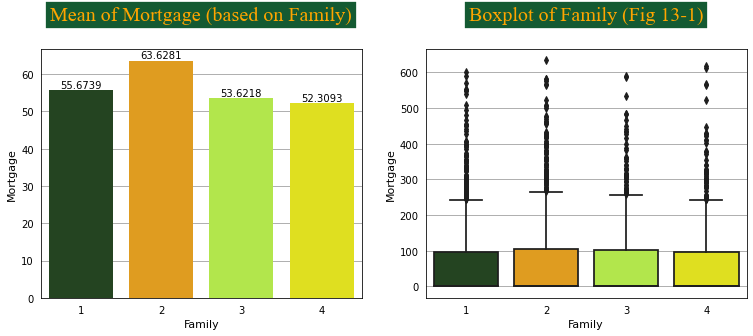

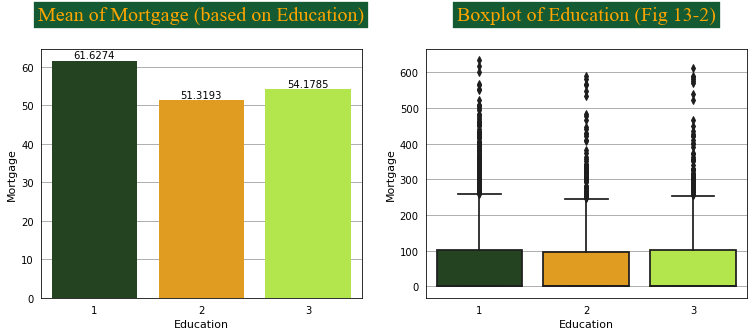

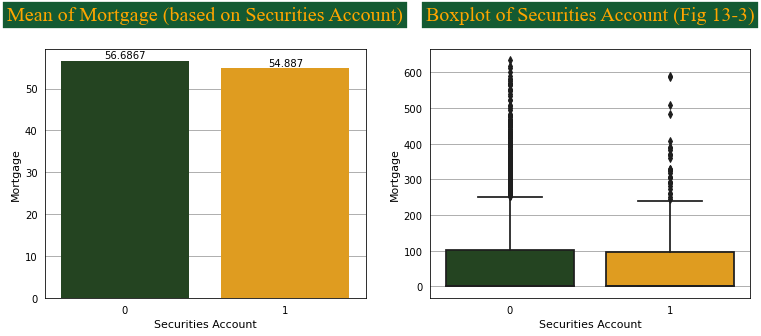

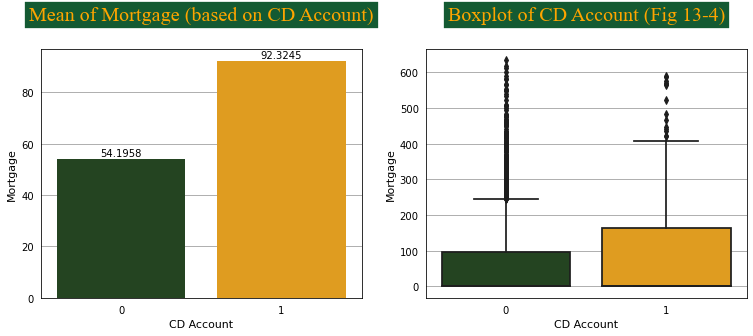

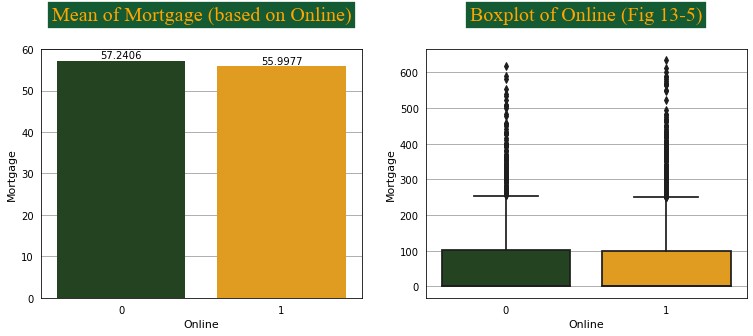

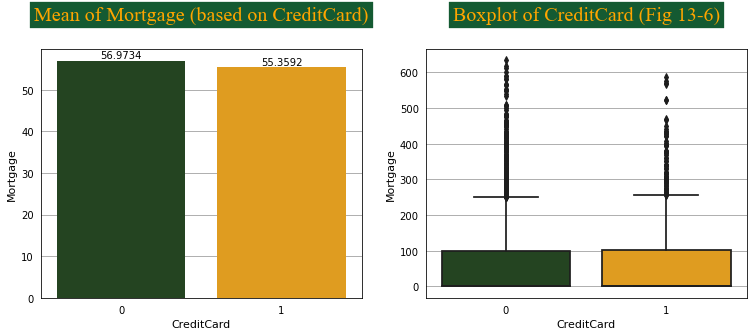

In [76]:
# Mean of Income and CCAvg based on each feature
for i, col in enumerate(['Income', 'CCAvg','Mortgage']):
    print('='*30, f"Mean of {col} in each categorical feature", '='*30)
    for j, cat in enumerate(discrete_cols2):
        fig , ax= plt.subplots(1,2, figsize=(10,4))
        gp = df.groupby([cat])[col].mean().to_frame().reset_index()
        sns.barplot(data=gp, x=cat, y=col, ax=ax[0])
        for container in ax[0].containers:
            ax[0].bar_label(container)
        ax[0].set_title(f'Mean of {col} (based on {cat})', y=1.09, **FONT)

        sns.boxplot(data=df, x=cat, y=col, ax=ax[1])
        ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.09, **FONT)

        plt.show()

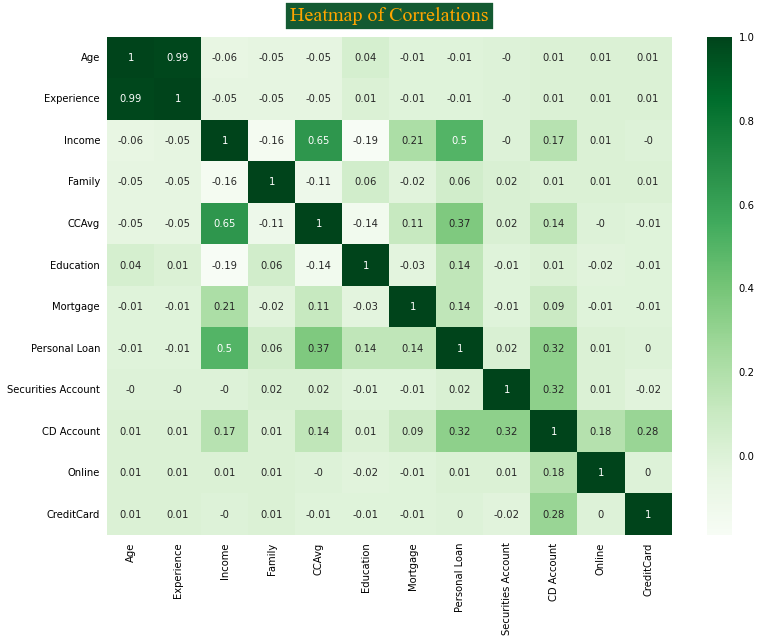

In [77]:
# draw heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02, fontdict=FONT)
plt.show()

#  Multivariate Analysis

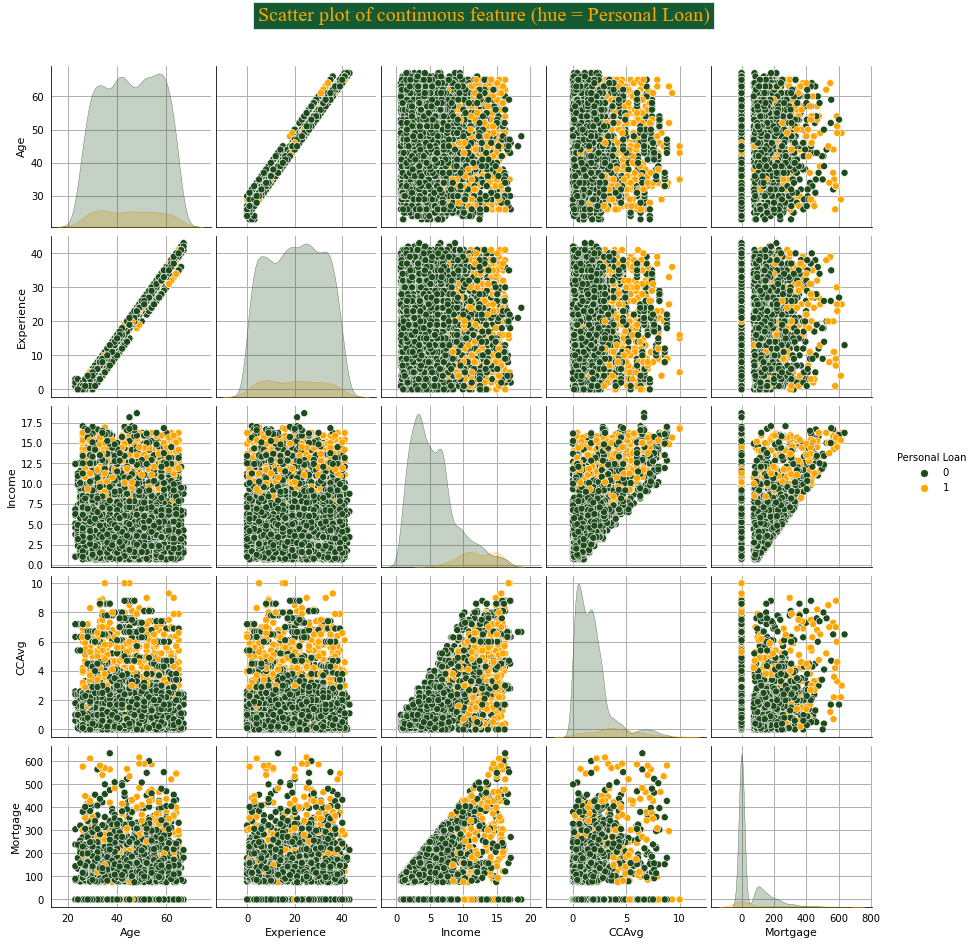

In [78]:
# draw pairplot with hue = Personal Loan
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05, **FONT)
plt.show()

In [79]:
continuous_cols = ['Age','Experience','CCAvg','Mortgage']

for i, col in enumerate(continuous_cols):
    fig = px.scatter_3d(
        data_frame= df,
        x=df.Income,
        y=df[col],
        z=df['Personal Loan'],
        color=df['Personal Loan'].astype(str),
        color_discrete_map={'1':'orange', '0':'red'},
        template='ggplot2',
        hover_name='Age',
        # hover_data=
        opacity=0.6,
        # symbol='Transmission',
        # symbol_map=
        # log_x=True,
        # log_z=True,
        height=700,
        title=f'3D scatter of features based on Personal Loan (Fig {i+1})')

    fig.update_layout(
        title_text="Box Plot Styling Outliers",
        title_font=dict(color='orange', family='newtimeroman', size=25),
        title_x=0.45,
        paper_bgcolor='#145A32',
        # plot_bgcolor='#DAF7A6',
        font=dict(color='#DAF7A6', family='newtimeroman', size=16),
    )
    pio.show(fig)

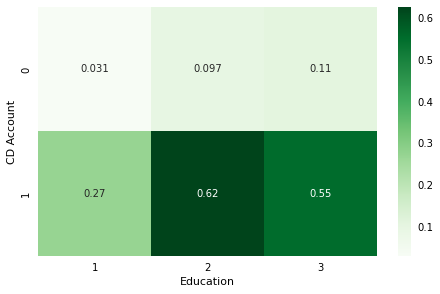

In [80]:
results = pd.pivot_table(data=df, index='CD Account', columns='Education', values='Personal Loan')
sns.heatmap(results, cmap='Greens', annot=True)
plt.show()

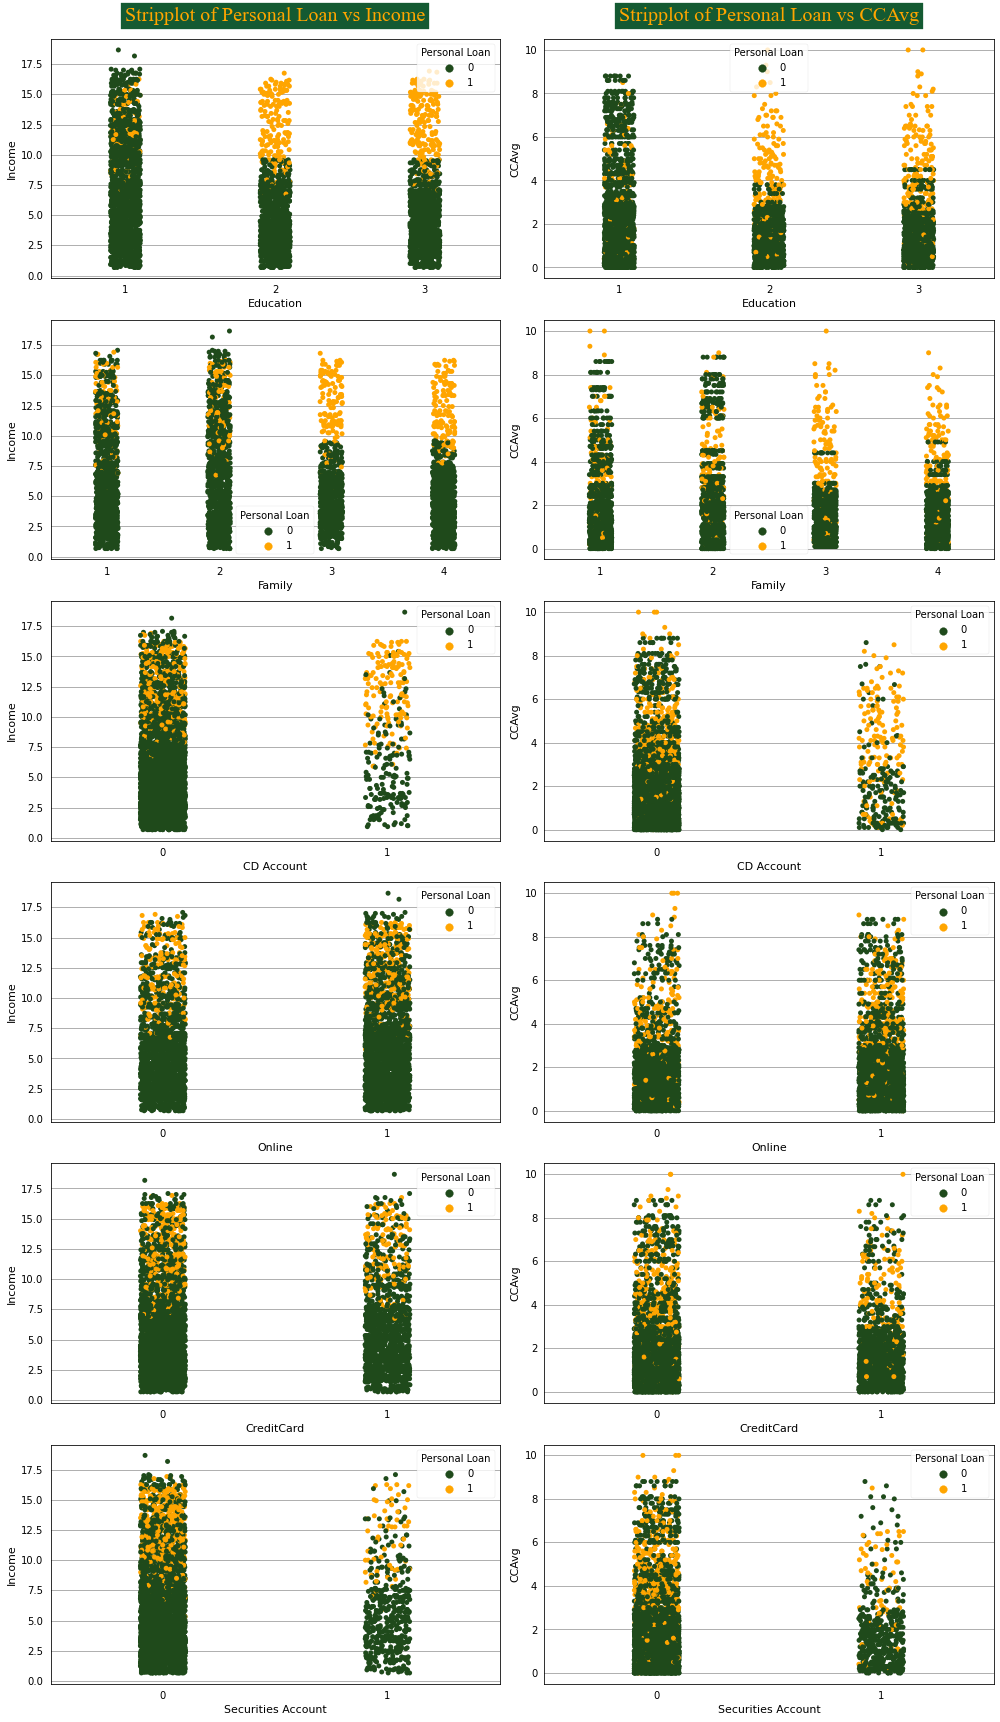

In [81]:
fig, ax = plt.subplots(6,2,figsize=(14,24))
sns.stripplot(data=df, x='Education', y='Income', hue='Personal Loan', ax=ax[0,0])
sns.stripplot(data=df, x='Education', y='CCAvg', hue='Personal Loan', ax=ax[0,1])
sns.stripplot(data=df, x='Family', y='Income', hue='Personal Loan', ax=ax[1,0])
sns.stripplot(data=df, x='Family', y='CCAvg', hue='Personal Loan', ax=ax[1,1])
sns.stripplot(data=df, x='CD Account', y='Income', hue='Personal Loan', ax=ax[2,0])
sns.stripplot(data=df, x='CD Account', y='CCAvg', hue='Personal Loan', ax=ax[2,1])
sns.stripplot(data=df, x='Online', y='Income', hue='Personal Loan', ax=ax[3,0])
sns.stripplot(data=df, x='Online', y='CCAvg', hue='Personal Loan', ax=ax[3,1])
sns.stripplot(data=df, x='CreditCard', y='Income', hue='Personal Loan', ax=ax[4,0])
sns.stripplot(data=df, x='CreditCard', y='CCAvg', hue='Personal Loan', ax=ax[4,1])
sns.stripplot(data=df, x='Securities Account', y='Income', hue='Personal Loan', ax=ax[5,0])
sns.stripplot(data=df, x='Securities Account', y='CCAvg', hue='Personal Loan', ax=ax[5,1])
ax[0,0].set_title('Stripplot of Personal Loan vs Income',y=1.05, **FONT)
ax[0,1].set_title('Stripplot of Personal Loan vs CCAvg',y=1.05, **FONT)
plt.tight_layout()
plt.show()

#  Modeling our Data Set

In [82]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [83]:
# define x and y
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values.reshape(-1,1)

Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def change_test_size(model, x, y, name):
    # try to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')

# --------------------------------------------------------------------------------------

def plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR(list): list of False Positive Rate
        TPR(list): list of True Positive Rate
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    fig1 = go.Figure()
    fig2 = go.Figure()
    # the green line represents where TPR = FPR
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'),x0=0, x1=1, y0=0, y1=1)
    for fpr_i, tpr_i, auc_i, name in zip(FPR, TPR, AUC, Model):
        # ROC Curve
        fig1.add_trace(go.Scatter(x=fpr_i, y=tpr_i, name=f"{name} AUC = {auc_i:.4f}", mode='lines'))
    # the histogram of scores compared to true labels
    fig_hist = px.histogram(x=y_proba_test[:,1], color=y_test.ravel(), nbins=50, labels=dict(color='Personal Loan', x='Probability'))
    fig2.add_trace(fig_hist.data[0])
    fig2.add_trace(fig_hist.data[1])
    # Reduce opacity to see both histograms
    fig2.update_traces(opacity=0.75)

    # Accuracy plot
    fig3 = make_subplots(rows=1, cols=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Recall, mode='lines+markers', name='Recall', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Precision, mode='lines+markers', name='Precision', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=F1, mode='lines+markers', name='F1 score', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)

    fig3.add_trace(go.Scatter(y=ACC_train, mode='lines+markers', name='ACC train', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)

    # update layout and show figs
    
    fig1.update_layout(
        title= 'ROC curve and AUC score',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500,
        showlegend=True)
    fig2.update_layout(
        # showlegend=True, 
        barmode='overlay',  # Overlay both histograms
        title='Interpret ROC curve by histogram',
        xaxis_title='Probability',
        yaxis_title='Count')
        
    fig3.update_layout(
        showlegend=True,
        title='Model Evaluation & Train and Test Accuracy)',
        xaxis_title='Model',
        yaxis_title='Evaluation measure')
    # Set custom x-axis labels
    fig3.update_xaxes(ticktext=list(range(1,20)))
    fig1.show()
    fig2.show()
    fig3.show()

# --------------------------------------------------------------------------------------

def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # split data to train and test
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Class Distribution in y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Class Distribution in y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    # Normalization
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # define model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # append results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, rec_test, rec_train

In [84]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Random Forest

In [85]:
# Check cross validation on Random Forest model to estimate model performance (Accuracy)
operations = [('RF', RandomForestClassifier())]
pipe8_1 = Pipeline(operations)
Perform_cross_val(pipe8_1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.98675
CV results: [0.985  0.99   0.9925 0.985  0.985  0.975  0.9925 0.9825 0.9875 0.9925]



In [86]:
# Check cross validation on RandomForest model to estimate model performance (Recall)
Perform_cross_val(pipe8_1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.8775303643724698
CV results: [0.86842105 0.92105263 0.89473684 0.89473684 0.89473684 0.76315789
 0.92307692 0.82051282 0.87179487 0.92307692]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[901   3]
 [ 12  84]]


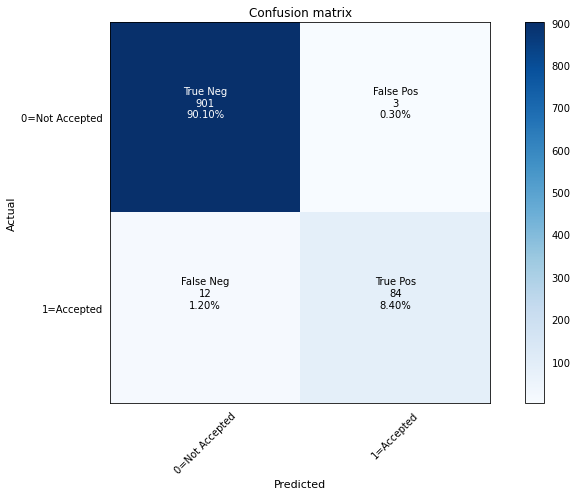

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.88      0.92        96

    accuracy                           0.98      1000
   macro avg       0.98      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000
 

Jaccard Score: 0.8484848484848485
Log loss: 0.5180840447159517 



In [87]:
# create initial RF model without pruning
rf = RandomForestClassifier()
pipe8_1 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_1, acc_train_8_1, rec_test_8_1, rec_train_8_1 = modeling(
    clf=pipe8_1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 1',
    stratify=True)

In [88]:
# check accuracy, recall and overfitting
print(f"Train Accuracy: {acc_train_8_1}")
print(f"Test Accuracy: {acc_test_8_1}")
print(f"Train Recall: {rec_train_8_1}")
print(f"Test Recall: {rec_test_8_1}")

Train Accuracy: 1.0
Test Accuracy: 0.985
Train Recall: 1.0
Test Recall: 0.875


# It seems that the model tends to overfit here as well, so to solve this problem, we perform parameter tuning for RF: 

Explore random forest bootstrap sample size
>0.1, mean:0.762, ste:0.066
>0.2, mean:0.826, ste:0.046
>0.3, mean:0.846, ste:0.052
>0.4, mean:0.859, ste:0.050
>0.5, mean:0.859, ste:0.050
>0.6, mean:0.872, ste:0.051
>0.7, mean:0.875, ste:0.051
>0.8, mean:0.877, ste:0.047
>0.9, mean:0.876, ste:0.045
>1.0, mean:0.881, ste:0.043


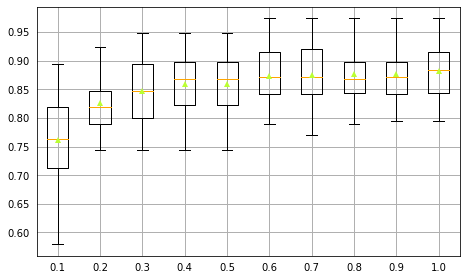

Explore random forest number of features effect
>1, mean:0.779, ste:0.062
>2, mean:0.865, ste:0.048
>3, mean:0.885, ste:0.040
>4, mean:0.891, ste:0.045
>5, mean:0.893, ste:0.040
>6, mean:0.892, ste:0.040
>7, mean:0.901, ste:0.041


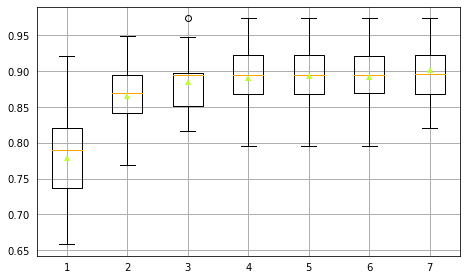

Explore random forest tree depth effect
>1, mean:0.000, ste:0.000
>2, mean:0.115, ste:0.057
>3, mean:0.455, ste:0.089
>4, mean:0.655, ste:0.071
>5, mean:0.794, ste:0.066
>6, mean:0.846, ste:0.057
>7, mean:0.863, ste:0.048
>8, mean:0.871, ste:0.054
>9, mean:0.872, ste:0.047
>None, mean:0.879, ste:0.044


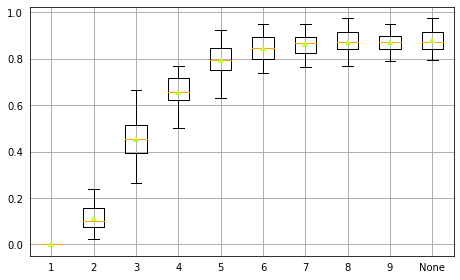

In [89]:
# parameter tuning by loops instead grid search because 
# gridsearch is very expensive and Time-consuming for this dataset
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate 
# explore random forest bootstrap sample size
def get_models1():
	print("Explore random forest bootstrap sample size")
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = f'{i:.1f}'
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# get a list of models to evaluate
# explore random forest number of features effect
def get_models2():
	print("Explore random forest number of features effect")
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# get a list of models to evaluate
# explore random forest tree depth effect
def get_models3():
	print("Explore random forest tree depth effect")
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,10)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
	return scores
 
for func in [get_models1, get_models2, get_models3]:
	# get the models to evaluate
	models = func()
	# evaluate the models and store results
	results, names = list(), list()
	for name, model in models.items():
		# evaluate the model
		scores = evaluate_model(model, x_train, y_train)
		# store the results
		results.append(scores)
		names.append(name)
		# summarize the performance along the way
		print(f">{name:s}, mean:{mean(scores):.3f}, ste:{std(scores):.3f}")
	# plot model performance for comparison
	plt.boxplot(results, labels=names, showmeans=True)
	plt.show()

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[903   1]
 [  8  88]]


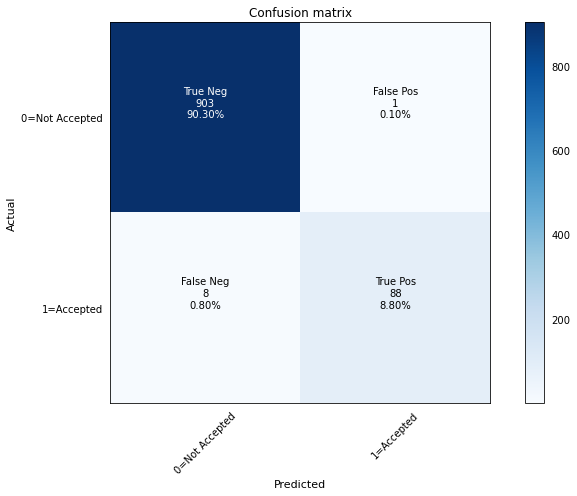

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.99      0.92      0.95        96

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.9072164948453608
Log loss: 0.3108497871516273 



In [90]:
# create initial RF model without pruning
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_samples=None,
    max_features=7,
    max_depth=None,
    class_weight='balanced_subsample',)
pipe8_2 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_2, acc_train_8_2, rec_test_8_2, rec_train_8_2 = modeling(
    clf=pipe8_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 2',
    stratify=True)

In [91]:
print(f"Train Accuracy: {acc_train_8_2}")
print(f"Test Accuracy: {acc_test_8_2}")
print(f"Train Recall: {rec_train_8_2}")
print(f"Test Recall: {rec_test_8_2}")

Train Accuracy: 1.0
Test Accuracy: 0.991
Train Recall: 1.0
Test Recall: 0.9166666666666666


#  And again, the model tends to overfit. So we change some of parameter to prevent overfitting and get the best result


-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[874  30]
 [  3  93]]


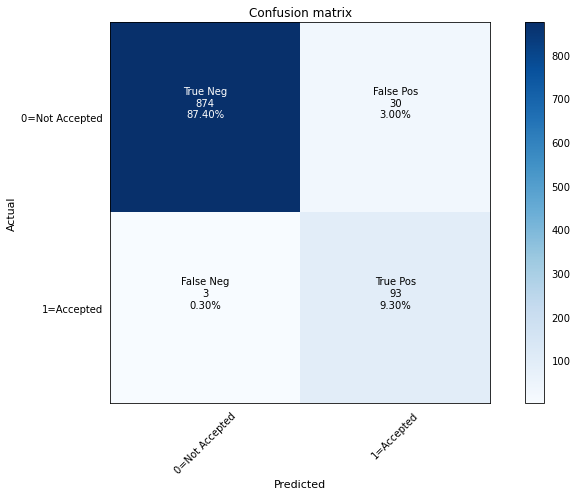

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       904
           1       0.76      0.97      0.85        96

    accuracy                           0.97      1000
   macro avg       0.88      0.97      0.92      1000
weighted avg       0.97      0.97      0.97      1000
 

Jaccard Score: 0.7380952380952381
Log loss: 1.1398036089549592 



In [92]:
# create initial RF model without pruning
from sklearn.preprocessing import RobustScaler


rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=150,
    max_samples=None,
    max_features=7,
    max_depth=4,
    class_weight='balanced_subsample',
    oob_score=True
)
pipe8_3 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_3, acc_train_8_3, rec_test_8_3, rec_train_8_3 = modeling(
    clf=pipe8_3,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 3',
    stratify=True)

In [93]:
# print result for check overfit
print(f"Train Accuracy: {acc_train_8_3}")
print(f"Test Accuracy: {acc_test_8_3}")
print(f"Train Recall: {rec_train_8_3}")
print(f"Test Recall: {rec_test_8_3}")
print(f"OOB score: {rf.oob_score_}")


Train Accuracy: 0.9735
Test Accuracy: 0.967
Train Recall: 0.9895833333333334
Test Recall: 0.96875
OOB score: 0.96725


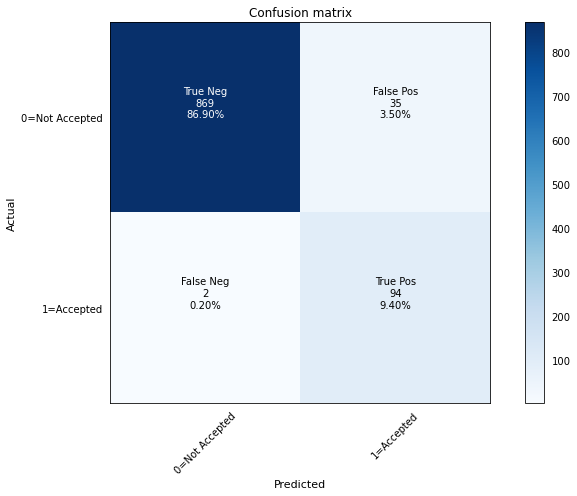

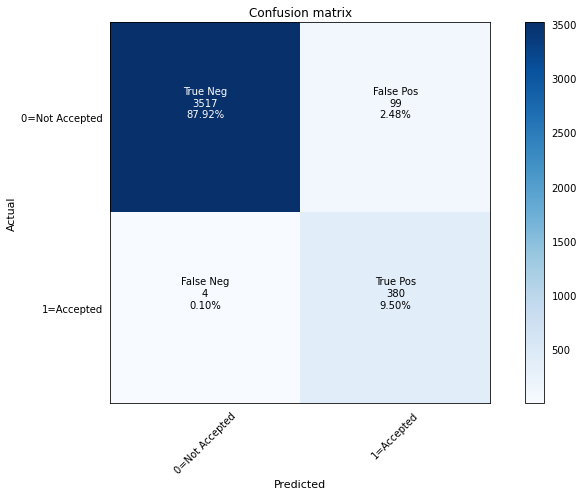

In [94]:
rf.fit(x_train,y_train.ravel())
y_train_predicted=rf.predict(x_train)
y_test_predicted=rf.predict(x_test)
cm = confusion_matrix(y_test, y_test_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_test, y_test_predicted))
cm = confusion_matrix(y_train, y_train_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_train, y_train_predicted))

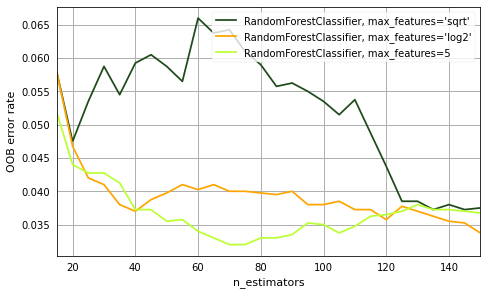

In [95]:
from typing import OrderedDict

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features='sqrt',
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features="log2",
        ),
    ),
    (
        "RandomForestClassifier, max_features=5",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features=5,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

It doesn't seem overfit, so there is no problem. Very Nice result, because only 7 of the customers who accepted the bank loan were wrongly predicted

In [96]:
# check improve model by change test_size
change_test_size(pipe8_3, x, y, 'RF')

In [98]:
# add best model and its accuracy and recall
#best_model_test.loc[len(best_model_test.index)] = [f"Random Forest", '0.2', acc_test_8_3, rec_test_8_3]
#best_model_train.loc[len(best_model_train.index)] = [f"Random Forest", '0.2', acc_train_8_3, rec_train_8_3]

#  Visualizing Final Model

In [99]:
x_visual = df.drop('Personal Loan', axis=1)
y_visual = df['Personal Loan'].values.reshape(-1,1)

In [100]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [101]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x_visual, y_visual, test_size=0.2, random_state=0, stratify=y_visual)
pipe8_3.fit(x_train, y_train.ravel())
y_pred_test = pipe8_3.predict(x_test)
y_pred_train = pipe8_3.predict(x_train)
x_test.insert(11,'Personal Loan', y_test)
x_test.insert(12, 'Pred', y_pred_test)
x_train.insert(11,'Personal Loan', y_train)
x_train.insert(12, 'Pred', y_pred_train)
cols =['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in cols:
    fig = px.scatter_3d(
        data_frame= x_test,
        x=x_test.Income,
        y=x_test[col],
        z=x_test['Personal Loan'],
        color=y_pred_test,
        color_discrete_map={0:'red', 1:'orange'},
        template='ggplot2',
        hover_name='Age',
        # hover_data=
        opacity=0.6,
        # symbol='Transmission',
        # symbol_map=
        # log_x=True,
        # log_z=True,
        height=700,
        title=f'Visualization Performance of Model in Predicting')

    pio.show(fig)

#  Prediction Sample Data

In [102]:
# fit final model on all of data (train + test)
final_model = pipe8_3
final_model.fit(x_visual, y_visual)

# define sample data
sample = pd.DataFrame({'Age':[42], 'Experience':[16], 'Income':[30/12], 'Family':[3], 'CCAvg':[1.2], 'Education':[3], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[0], 'Online':[1], 'CreditCard':[1],})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predict sample data
result = final_model.predict(sample)

print('='*38)
print(f"Predict whether the customer will accept a personal loan? (0:No & 1:Yes): {result}")

Age: 42
Experience: 16
Income: 2.5
Family: 3
CCAvg: 1.2
Education: 3
Mortgage: 0
Securities Account: 1
CD Account: 0
Online: 1
CreditCard: 1

Predict whether the customer will accept a personal loan? (0:No & 1:Yes): [0]
